<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

**Пожалуйста, не удаляй мои комментарии**, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>
 
<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Определение возраста покупателей

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>  
    
Я бы посоветовал тебе подробнее раскрыть план своей работы. Это поможет тебе расставлять акценты в выводах.

## Исследовательский анализ данных

In [1]:
# Базовые библиотеки
import pandas as pd
import numpy as np
  
# Нейросеть
from tensorflow.keras.layers import Conv2D, Flatten, GlobalAveragePooling2D, Dense, AvgPool2D
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Графика
from PIL import Image # Просмотр изображений
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
data.tail()

,file_name,real_age
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20
7590,007612.jpg,47


In [5]:
data.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Размер выборки выведен. Выборка относительно небольшая, но мы еще можем нарастить ее, применяя аугментации


Text(0, 0.5, 'Количество объектов')

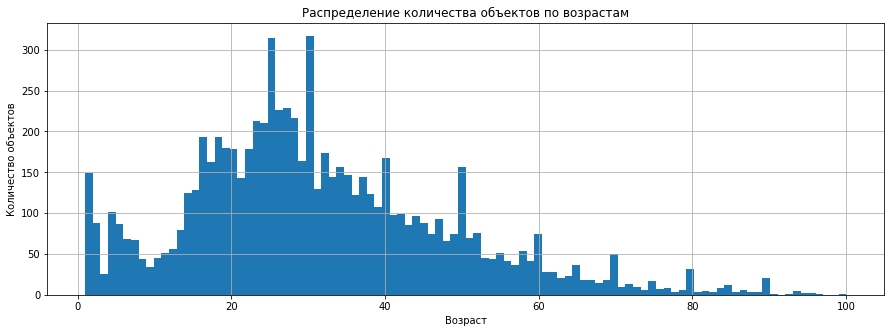

In [6]:
data.hist(bins=100, figsize = (15,5))
plt.title('Распределение количества объектов по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество объектов')

Датафрейм содержит 7591 объект, каждый из которых соответствует файлу из датасета. Этого количества достаточно для обучения нейросети, уже прошедшей тренировку на более крупной выборке. В датафрейме два признака: file_name с именами файлов и целевой признак real_age, содержащий возраст людей на изображениях. Целевой признак представлен в целых числах, где каждое число указывает на возраст в годах. Пропуски в данных отсутствуют.

Распределение возрастов нормальное, охватывает диапазон от 1 до 100 лет и характеризуется всплеском ближе к нулю. Пик нормального распределения смещён влево и достигает максимума в диапазоне 25-30 лет. Медианное значение возраста — 29 лет. Для повышения точности предсказания необходимо выровнять распределение возрастов, обеспечив равномерное представление разных возрастных групп.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Гистограмма целевого признака выведена верно. Пики в районе "юбилейных" лет, они тут могут быть связаны с тем, что настоящий возраст был неизвестен тому, кто размечал датасет, и он попросту округлял его. Отлично, что была проведена работа над оформлением графика)

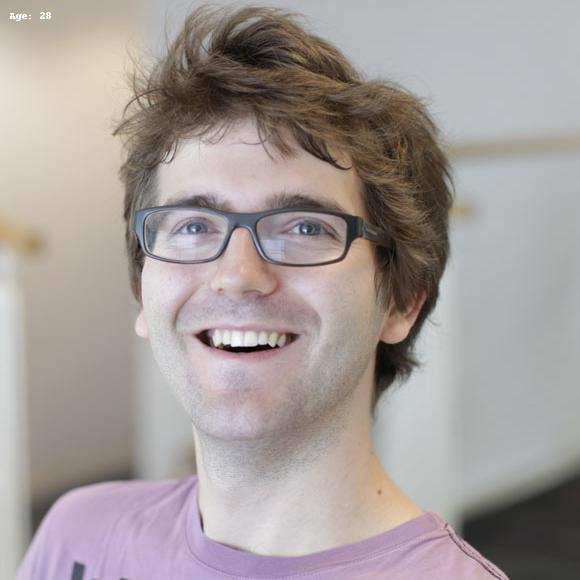

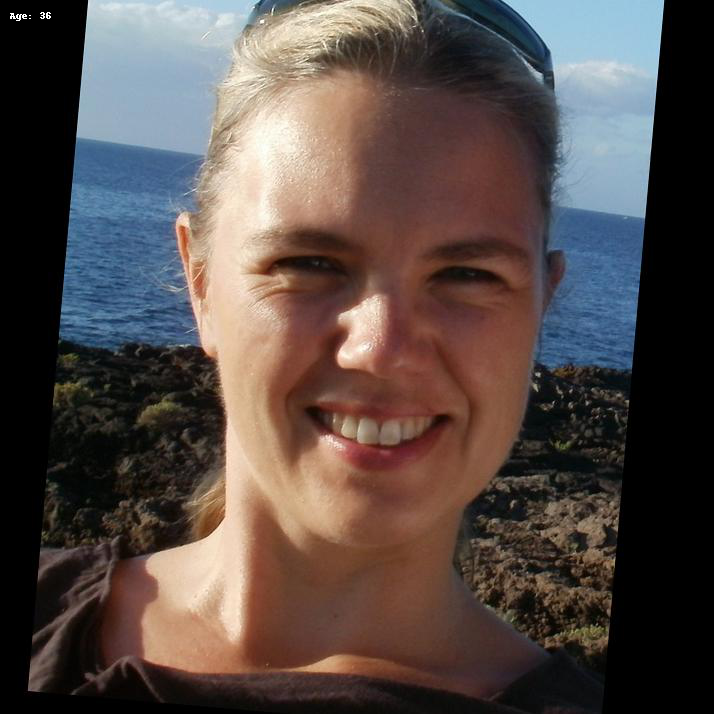

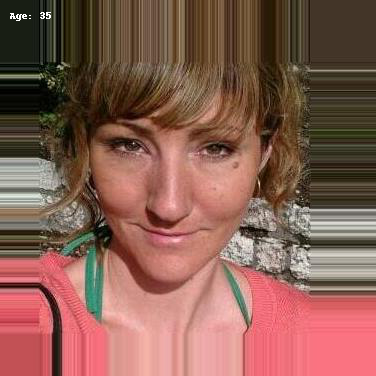

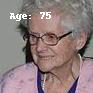

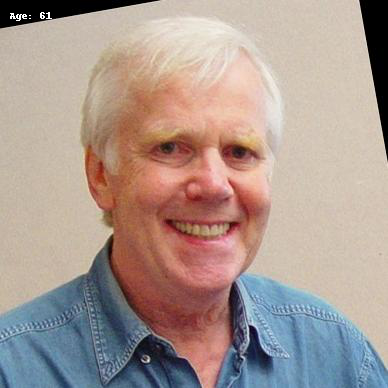

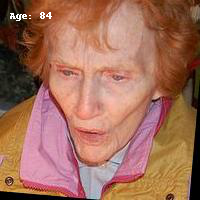

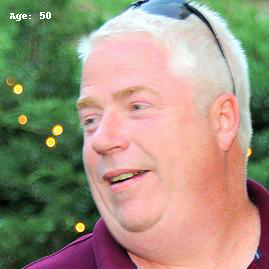

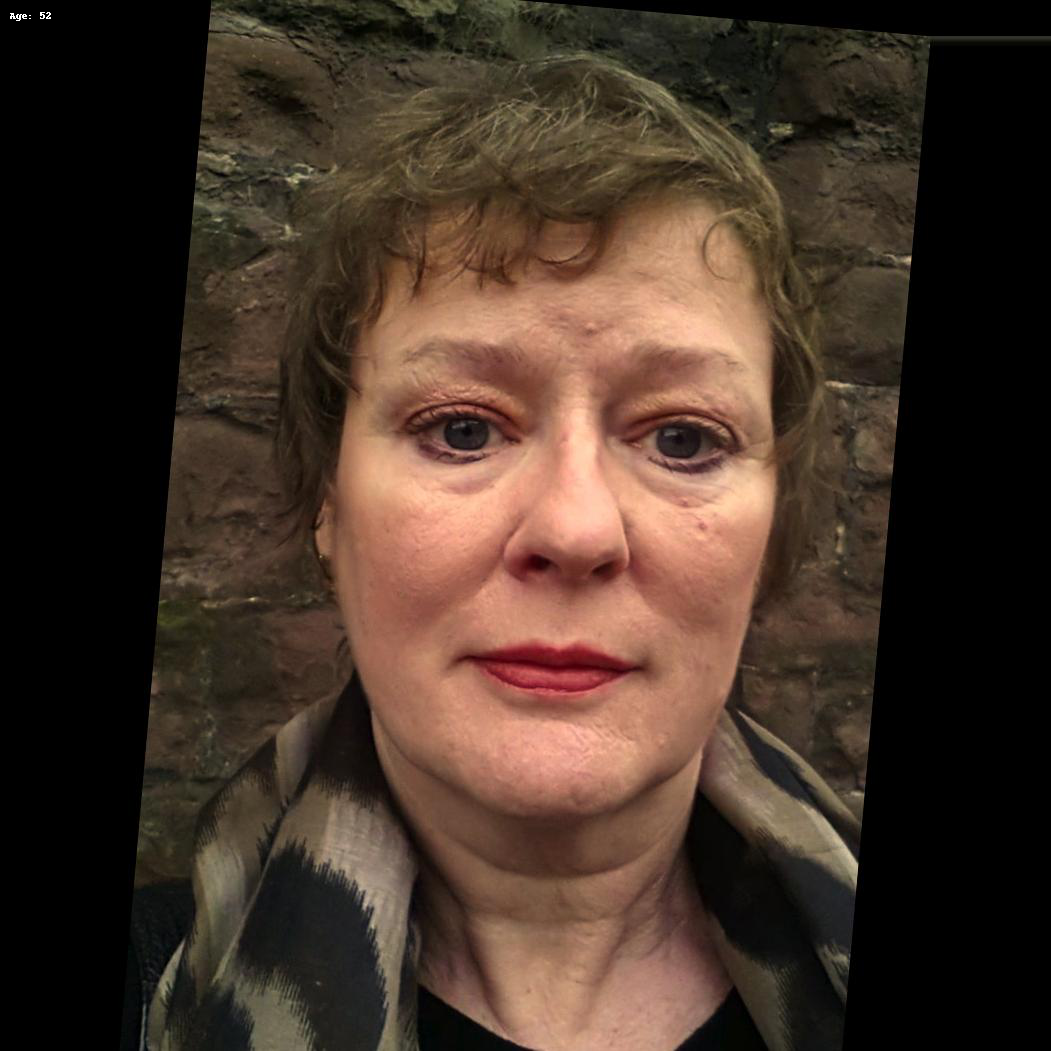

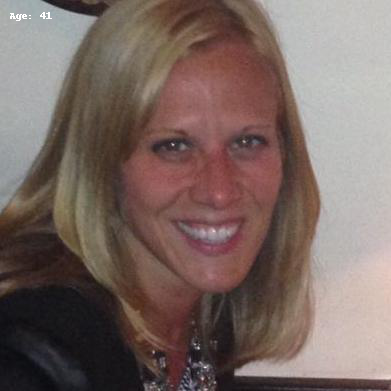

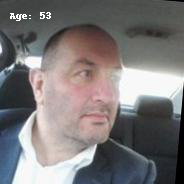

In [7]:
import os
import random
import pandas as pd
from PIL import Image, ImageDraw, ImageFont

# Путь к папке с изображениями и файлу с метками
folder_path = '/datasets/faces/final_files/'
labels_path = '/datasets/faces/labels.csv'

# Загрузка данных из labels.csv
labels_df = pd.read_csv(labels_path)

# Создаем словарь для быстрого доступа к возрасту по имени файла
age_dict = dict(zip(labels_df['file_name'], labels_df['real_age']))

# Список имен файлов от 000000.jpg до 007612.jpg
file_names = [f'{str(i).zfill(6)}.jpg' for i in range(7613)]  # zfill(6) добавляет ведущие нули до 6 знаков

# Случайный выбор 10 изображений
selected_files = random.sample(file_names, 10)

# Открытие, добавление возраста и отображение выбранных изображений
for file_name in selected_files:
    image_path = os.path.join(folder_path, file_name)
    image = Image.open(image_path)
    
    # Получение возраста из словаря
    age = age_dict.get(file_name, "Unknown")

    # Добавление текста с возрастом
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    text = f"Age: {age}"
    text_position = (10, 10)  # Позиция текста на изображении
    draw.text(text_position, text, fill="white", font=font)

    # Показ изображения с текстом
    image.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
     
Примеры фотографий выведены. Отлично, что указан возраст у фотографий!

Датасет состоит из фотографий людей разного возраста и пола, выполненных при различных условиях освещения и с разным фоном. Все изображения представлены в формате jpg, имеют три цветовых канала RGB, варьируются по размеру. Для предсказаний требуется использование предобученной сверточной нейросети типа ResNet.

Фотографии хранятся в отдельных файлах в одной директории. Предварительная обработка большенства изображений была выполнена: лица расположены практически вертикально и занимают основную часть кадра

Некоторые изображения содержат артефакты — черные или белые полосы, оставшиеся после поворота и обрезки, а также «растянутые» пиксели. Тем не менее, разметка фотографий корректна и приблизительно соответствует указанному возрасту в соответствующих записях датафрейма.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично !👍:</b>
    
Анализ проведен корректно.
        
Добавлю, общая ориентация фотографий примерно одинакова - в некоторых фото их уже повернули за нас, чтобы выровнять положение лица, значит нам их не обязательно поворачивать, а начальный размер изображений отличается, в силу того, что визуально заметно различное качество фото, где-то есть черные рамки (они не несут полезной информации). В итоге, размер изображений мы приведем к единому перед обучением модели.
    
Советую изучить базовые возможности аугментаций в <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">документации</a> или в <a href="https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22">статье</a>.     
 </div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50

def load_train(path):
    labels = pd.read_csv(f'{path}/labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(f'{path}/labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=f'{path}/final_files',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_datagen_flow

def create_model(input_shape):
    backbone = ResNet50(
        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
        input_shape=input_shape,
        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1))

    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=5, steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

```

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Параметру  `target_size` стоит задать значение `(224, 224)`, ведь на таком размере фото обучалась сеть в Imagenet.

```

Train for 356 steps, validate for 119 steps
Epoch 1/5
356/356 - 73s - loss: 225.5238 - mae: 10.8987 - val_loss: 770.9273 - val_mae: 22.6911
Epoch 2/5
356/356 - 46s - loss: 71.6480 - mae: 6.4862 - val_loss: 120.6895 - val_mae: 8.3496
Epoch 3/5
356/356 - 46s - loss: 37.9687 - mae: 4.7896 - val_loss: 82.9635 - val_mae: 7.0365
Epoch 4/5
356/356 - 45s - loss: 23.8848 - mae: 3.7893 - val_loss: 107.4116 - val_mae: 7.8901
Epoch 5/5
356/356 - 47s - loss: 17.1318 - mae: 3.1563 - val_loss: 77.4644 - val_mae: 6.6926

119/119 - 12s - loss: 77.4644 - mae: 6.6926

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике)

## Анализ обученной модели

Цель обучения нейросети успешно достигнута. После запуска кода на GPU с валидационными данными, мы получили значение показателя «MAE», равное 6,6926. Это значение меньше целевого (8). Поскольку «MAE» измеряется в абсолютных величинах, это значит, что созданная модель ошибается в предсказании возраста человека по фотографии не более чем на 6,6926 лет.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Пожалуйста, подробнее опиши использованную модель и параметры

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера (общий вывод по проекту) <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
    
Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.
     
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2>  Итоговый комментарий ревьюера 2 (итоговый вывод по проекту) <a class="tocSkip"> </h2>    
    
      
  
Теперь почти идеально, молодец! Принимаю твой проект)
    
Могу поделиться такими ссылками для углубленного изучения темы спринта:
    
- Видеокурс от Stanford University: https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk
    
- Курс от Физтех-школы Прикладной Математики и Информатики МФТИ: https://vk.com/dlschool_mipt
    
- Курс Нейронные сети и компьютерное зрение от Sumsung: https://stepik.org/course/50352/promo#toc    
    
    
В этом проекте все шаги отработаны. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: оценить еще раз возраст по фото.
2. Анализ ошибок: к примеру модель сильно ошибается на сегменте пожилых людей, зато почти идеально работает с детьми. Тогда мы поймем, каких возрастов фото было бы хорошо добавить в выборку для дообучения.
3. Дополнительно изучить распределение целевого признака, возможно что выборка была составлена неслучайным образом (видна небольшая бимодальность), посмотреть, каких возрастных групп представлено мало, чтобы их потом добавить в выборку.
    
Но цель нашего проекта достигнута. Рад был тебе помочь)
    
Удачи тебе в финальном проекте!
  
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы